In [2]:
from pathlib import Path
import sys
import os
parent_dir = Path(os.getcwd()).parent 
sys.path.append(str(parent_dir / "src" / "pendulum"))

## Single Pendulum


In [3]:
from single import SinglePendulum, SinglePendulumAnimator
p1 = SinglePendulum().from_yaml(str(parent_dir / "config" / "single.yaml"))

In [4]:
p1

SinglePendulum(init_cond=InitialCondition(theta_vec=[80.0, 0.0]), time_coord=TimeCoordinate(T=200.0, N_t=2001), m1=1.5, L1=1.0, g=9.8)

In [5]:
df1 = p1.gen_sol_df()
df1

,theta,theta_dot,x,y,time_step,energy_kinetic,energy_potential,energy_total
0,1.396263,0.000000,0.984808,-0.173648,0.0,0.000000,12.147372,12.147372
1,1.348080,-0.962153,0.975301,-0.220880,0.1,0.694304,11.453068,12.147372
2,1.204570,-1.901356,0.933685,-0.358095,0.2,2.711367,9.436005,12.147372
3,0.970103,-2.770324,0.824944,-0.565214,0.3,5.756020,6.391352,12.147372
4,0.655675,-3.483127,0.609694,-0.792637,0.4,9.099130,3.048241,12.147372
...,...,...,...,...,...,...,...,...
1996,-1.262497,-1.594961,-0.952851,-0.303439,199.6,1.907926,10.239452,12.147378
1997,-1.374697,-0.644559,-0.980834,-0.194845,199.7,0.311592,11.835785,12.147378
1998,-1.390969,0.319604,-0.983875,-0.178859,199.8,0.076610,12.070768,12.147378
1999,-1.310978,1.277436,-0.966437,-0.256905,199.9,1.223881,10.923496,12.147378


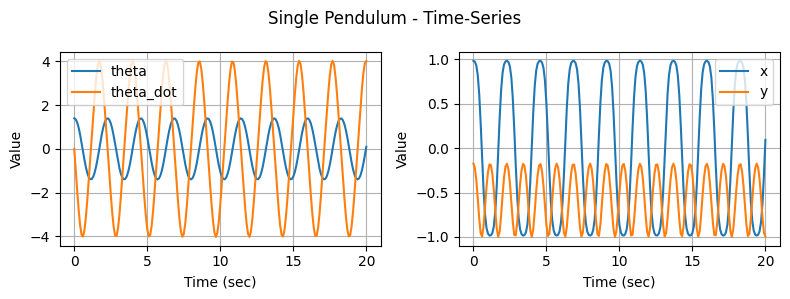

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(8, 3))
list_values = [["theta", "theta_dot"], ["x", "y"]]
T = int(df1.time_step.max()/10)
for i, ax in enumerate(axes.reshape(2,)):
    values = list_values[i]
    df1.set_index("time_step")[values].loc[:T].plot(ax=ax)
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Value")
    ax.grid()
fig.suptitle("Single Pendulum - Time-Series")
fig.tight_layout()
fig.savefig("fig/single_pendulum_time_series.png", dpi=200, facecolor='white')


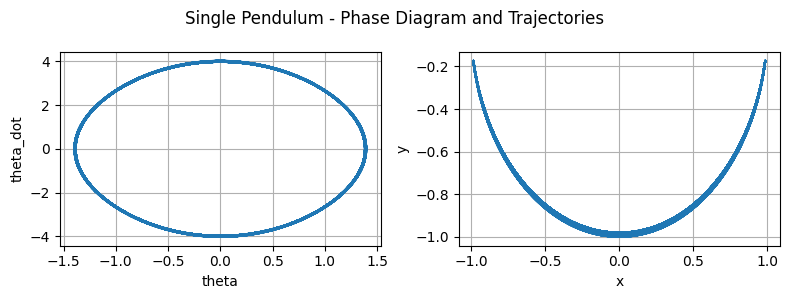

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1,2,figsize=(8, 3))
for i, ax in enumerate(axes.reshape(2,)):
    [x_val, y_val] = list_values[i]
    ax.plot(df1[x_val], df1[y_val])
    ax.set_ylabel(y_val)
    ax.set_xlabel(x_val)
    ax.grid()
fig.suptitle("Single Pendulum - Phase Diagram and Trajectories")
fig.tight_layout()
fig.savefig("fig/single_pendulum_phase_diagram.png", dpi=200, facecolor='white')

# df1.set_index("theta")[["theta_dot"]].plot(ax=ax)

MovieWriter imagemagick unavailable; using Pillow instead.


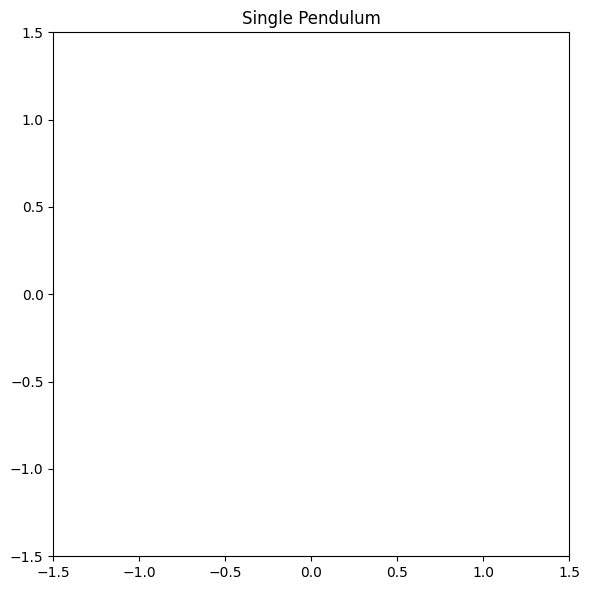

In [9]:
animator1 = SinglePendulumAnimator(df=df1, size=p1.L1)
animator1.init_canvas()
anim1 = animator1.run(frames=int(df1.shape[0] / 2), interval=10)
animator1.save(anim1, gif_file="fig/single_pendulum.gif", fps=60)

# Double Pendulum


In [10]:
from double import DoublePendulum, DoublePendulumAnimator

In [11]:
p2 = DoublePendulum().from_yaml(str(parent_dir / "config" / "double.yaml"))

In [12]:
p2

DoublePendulum(init_cond=InitialCondition(theta_vec=[60.0, 0.0, 80.0, 0.0]), time_coord=TimeCoordinate(T=200.0, N_t=2001), m1=1.5, L1=1.0, g=9.8, m2=2.0, L2=1.5)

In [13]:
df2 = p2.gen_sol_df()
df2

,theta1,theta1_dot,theta2,theta2_dot,x1,y1,x2,y2,time_step,energy_kinetic,energy_potential,energy_total
0,1.047198,0.000000,1.396263,0.000000,0.866025,-0.500000,2.343237,-0.760472,0.0,0.000000,63.494744,63.494744
1,1.014286,-0.649418,1.384610,-0.240580,0.849103,-0.528227,2.323180,-0.805895,0.1,1.305215,62.189528,63.494744
2,0.920823,-1.193819,1.345207,-0.568738,0.796100,-0.605165,2.258094,-0.940686,0.2,5.078123,58.416620,63.494744
3,0.782267,-1.536581,1.265667,-1.050956,0.704889,-0.709317,2.135601,-1.159942,0.3,10.906569,52.588175,63.494744
4,0.622830,-1.600384,1.129263,-1.703839,0.583336,-0.812231,1.939483,-1.453220,0.4,18.167646,45.327099,63.494745
...,...,...,...,...,...,...,...,...,...,...,...,...
1996,-0.608279,-1.469324,0.118916,-3.069490,-0.571456,-0.820633,-0.393502,-2.310040,199.6,35.084728,28.409924,63.494651
1997,-0.659848,0.493318,-0.240876,-4.140165,-0.612997,-0.790085,-0.970827,-2.246779,199.7,33.395777,30.098875,63.494651
1998,-0.530360,1.656641,-0.694337,-4.604310,-0.505843,-0.862625,-1.465658,-2.015343,199.8,29.925956,33.568695,63.494652
1999,-0.411144,0.653082,-1.100105,-3.464937,-0.399658,-0.916664,-1.736541,-1.596918,199.9,22.519214,40.975438,63.494652


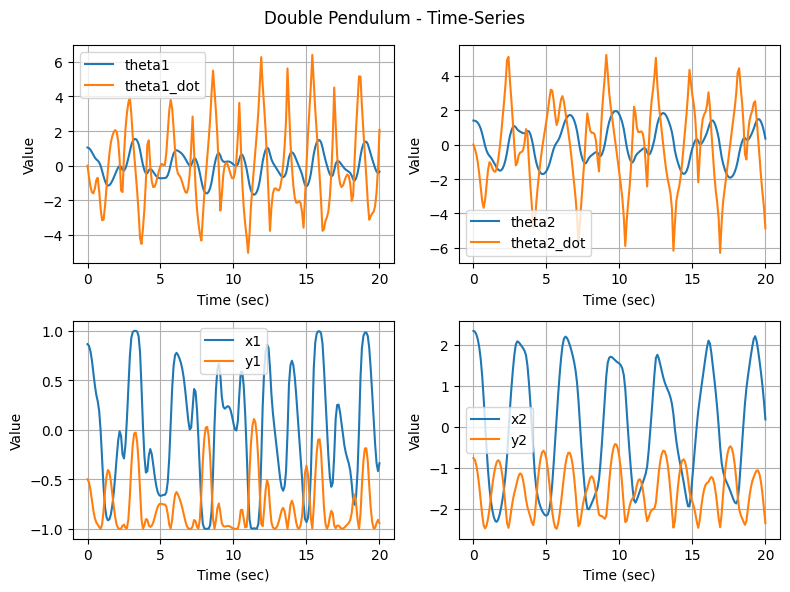

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize=(8, 6))
list_values = [["theta1", "theta1_dot"], ["theta2", "theta2_dot"], ["x1", "y1"], ["x2", "y2"]]
T = int(df2.time_step.max()/10)
for i, ax in enumerate(axes.reshape(4,)):
    values = list_values[i]
    df2.set_index("time_step")[values].loc[:T].plot(ax=ax)
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Value")
    ax.grid()
fig.suptitle("Double Pendulum - Time-Series")
fig.tight_layout()
fig.savefig("fig/double_pendulum_time_series.png", dpi=200, facecolor='white')


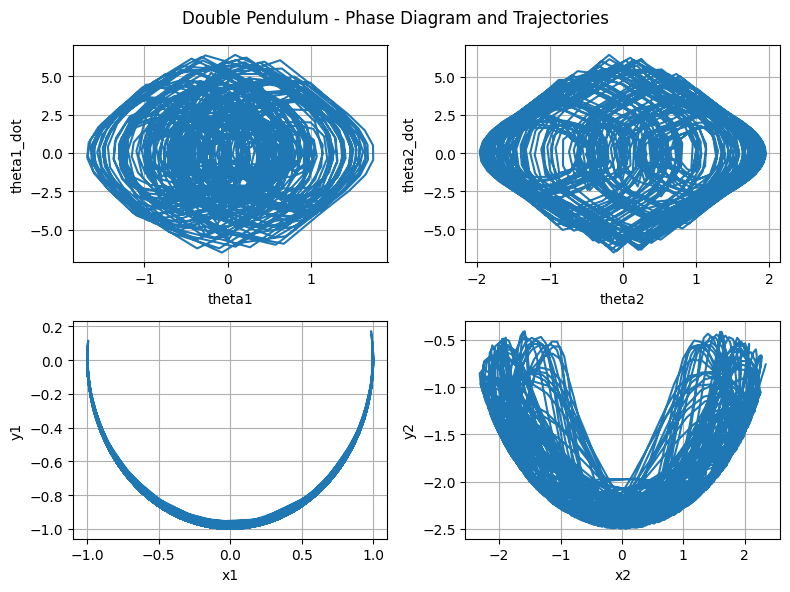

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2,2,figsize=(8, 6))
for i, ax in enumerate(axes.reshape(4,)):
    [x_val, y_val] = list_values[i]
    ax.plot(df2[x_val], df2[y_val])
    ax.set_ylabel(y_val)
    ax.set_xlabel(x_val)
    ax.grid()
fig.suptitle("Double Pendulum - Phase Diagram and Trajectories")
fig.tight_layout()
fig.savefig("fig/double_pendulum_phase_diagram.png", dpi=200, facecolor='white')

MovieWriter imagemagick unavailable; using Pillow instead.


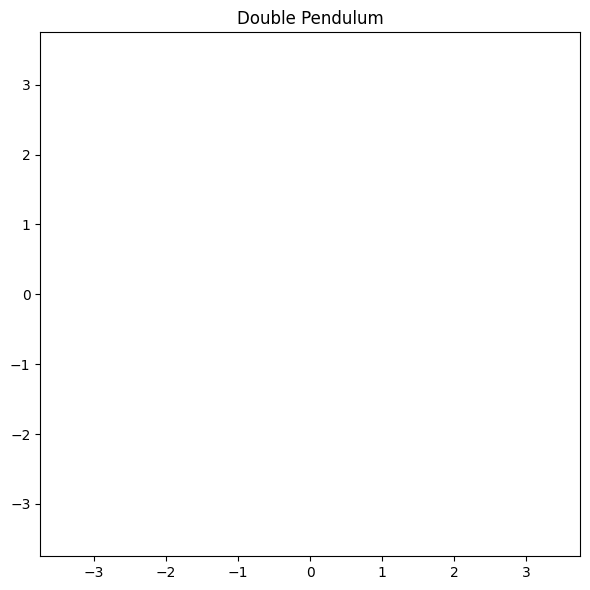

In [16]:
animator2 = DoublePendulumAnimator(df=df2, size=p2.L1+p2.L2)
animator2.init_canvas()
anim2 = animator2.run(frames=int(df2.shape[0]), interval=10)
animator2.save(anim2, gif_file="fig/double_pendulum.gif", fps=60)